# DBDB

### CREAZIONE DELL'OGGETTO PER SCIPY

In [2]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import scvelo as scv

In [3]:
adata = sc.read("MACs_Foam.h5")

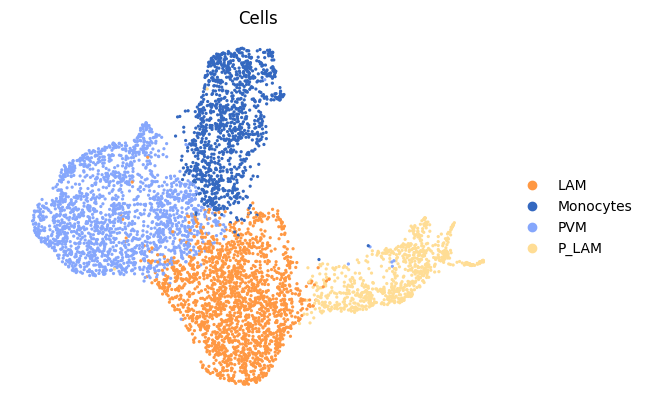

In [4]:
sc.pl.umap(adata, color=['Cells'], frameon=False, palette=["#FF9843","#3468C0","#86A7FC","#FFDD95"])

In [5]:
adata = adata[adata.obs['Sample'].isin(['db/db'])]

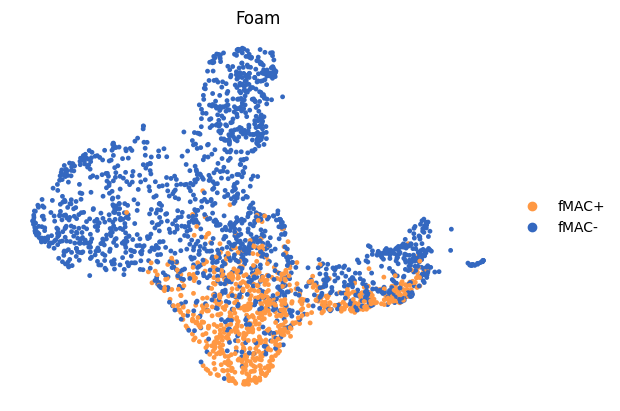

In [6]:
sc.pl.umap(adata, color=['Foam'], frameon=False)

### VELOCITY with scVELO

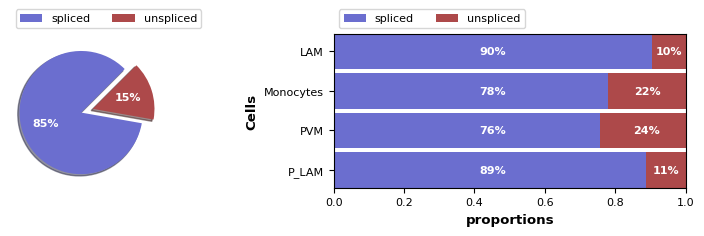

In [7]:
scv.pl.proportions(adata, groupby='Cells')

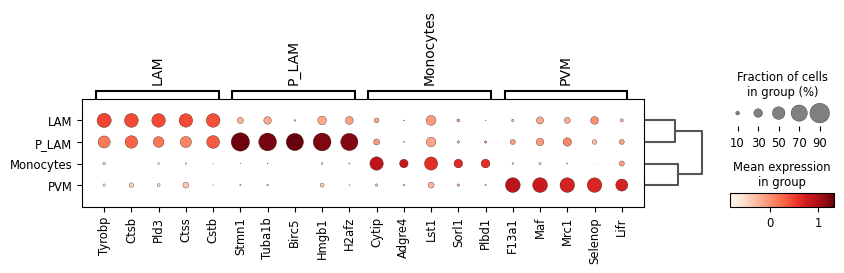

In [7]:
sc.pp.scale(adata, max_value=10)
sc.tl.rank_genes_groups(adata,'Cells', use_raw=False)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, groupby='Cells', use_raw=False, 
                                dendrogram=True)

In [8]:
scv.tl.recover_dynamics(adata, n_jobs=16)

recovering dynamics (using 16/16 cores)


  0%|          | 0/32245 [00:00<?, ?gene/s]

not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


Gm27253 not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


Dhcr24 not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.
not recoverable due to insufficient samples.


2810030D12Rik not recoverable due to insufficient samples.


Gm16968 not recoverable due to insufficient samples.
not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


Gm23925 not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [9]:
scv.tl.velocity(adata, mode="dynamical") #separately as a oneliner, not in the 'cell'...
scv.tl.velocity_graph(adata) #separately... and the note in the next line the basis as 'umap' and not 'X_umap'

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:10) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/2491 [00:00<?, ?cells/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 4) + inhomogeneous part.

saving figure to file ./figures/scvelo_velocity_DB.png


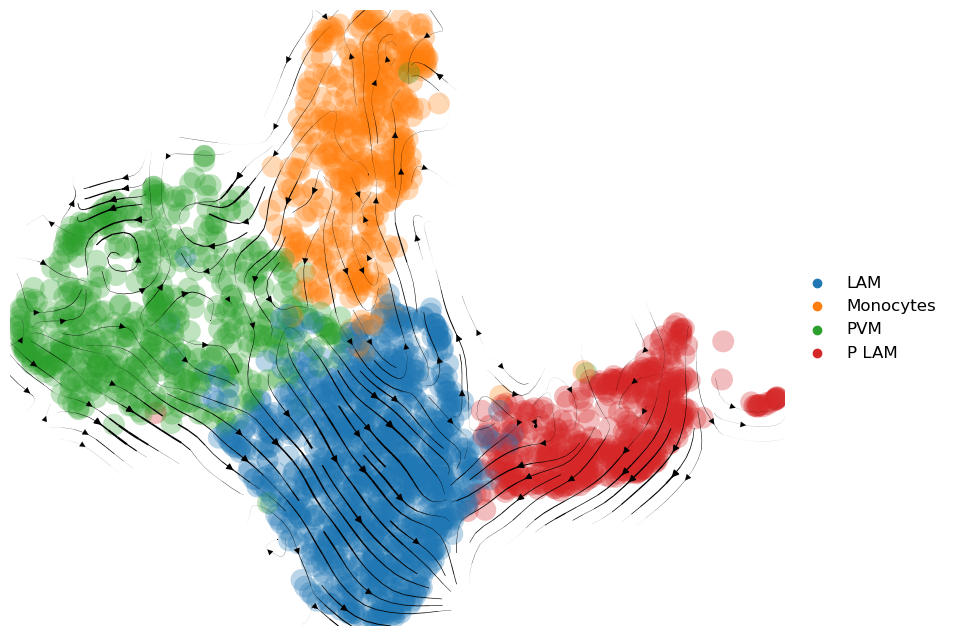

In [11]:
scv.pl.velocity_embedding_stream(adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=1,
                                color="Cells", save="velocity_FoamDB.png", figsize=(10,8), size=1000, legend_loc='right')

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=1,
                                color="Cells", save="velocity_DB.png", figsize=(10,8), size=1000, legend_loc='on data')

In [11]:
#from scipy.stats.stats import rankdata
scv.tl.rank_velocity_genes(adata, groupby='Cells', n_genes=200)
df = scv.core.get_df(adata.uns['rank_velocity_genes']['names'])

df.to_excel("Velocity_Gene_DB.xlsx", index=False)

df.head()

ranking velocity genes


/home/andrea/anaconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/tools/utils.py:463: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:07) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


LAM Monocytes       PVM   P_LAM
0   Rps21     Dusp2   Arhgef3   Cenpw
1  Lgals1    Treml4    Rmnd5a    Lsm6
2    Rps3     Blvrb    Prxl2b  Mrpl18
3  S100a6    Il10ra  Tmem176b  Polr2e
4    Actb     Pot1b    Cd209b   Cenpe

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
saving figure to file ./figures/scvelo_conf_DB.png


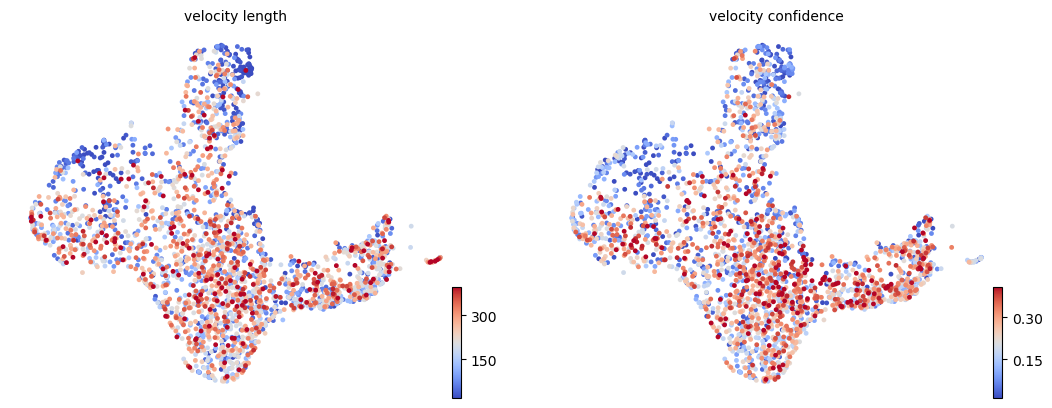

In [12]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], save="conf_DB.png")

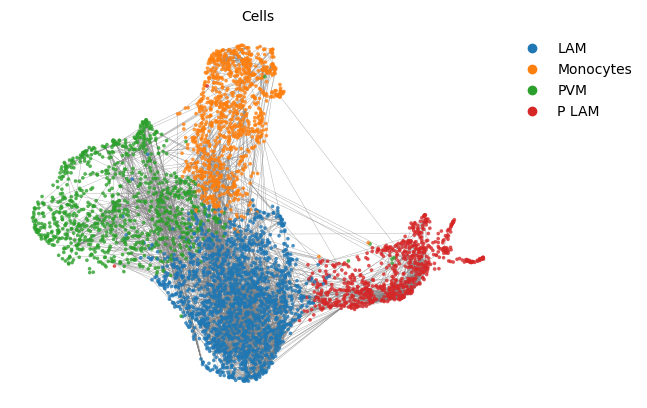

In [23]:
scv.pl.velocity_graph(adata, threshold=.3, color='Cells')

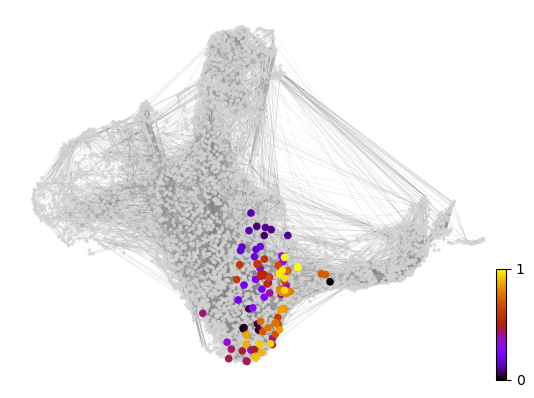

In [21]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

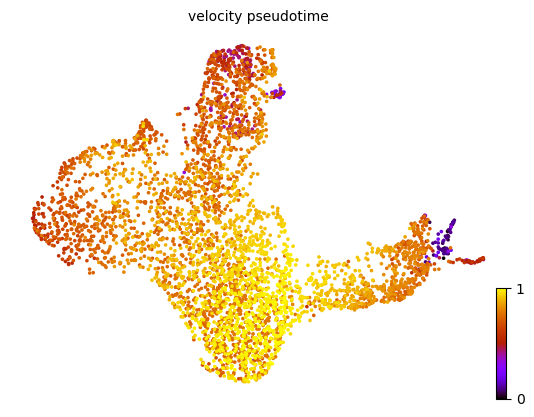

In [24]:
#scv.tl.velocity_pseudotime(adata)
scv.tl.velocity_pseudotime(adata, root_key="Monocytes")
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [25]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='Cells')
#df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


saving figure to file ./figures/scvelo_paga_DBHFD.png


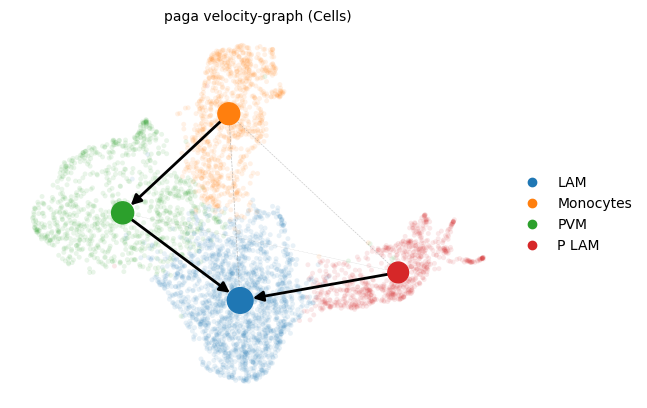

In [26]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5, 
            save="paga_DB.png")

computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


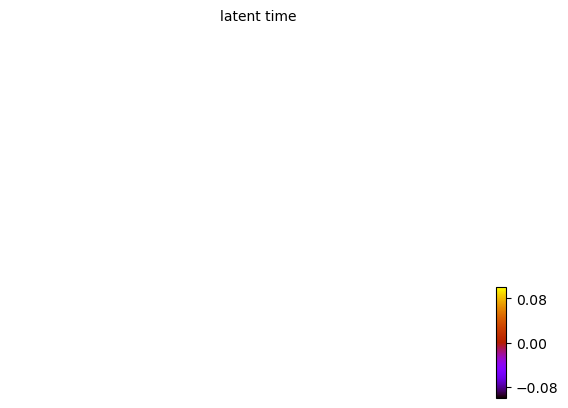

In [28]:
scv.tl.latent_time(adata, root_key="Monocytes")
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

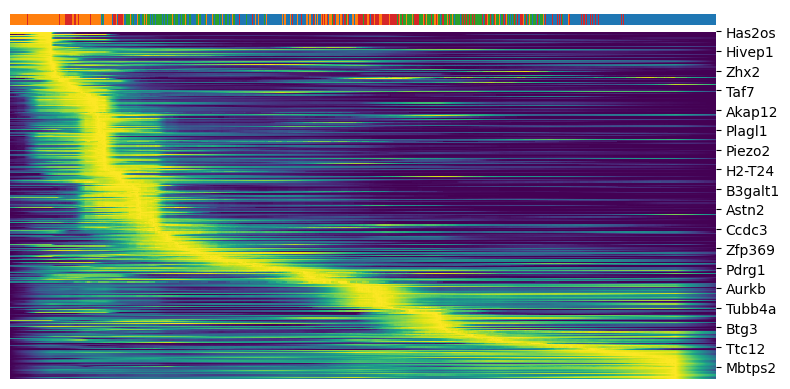

In [30]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='velocity_pseudotime', col_color='Cells',
               n_convolve=500)

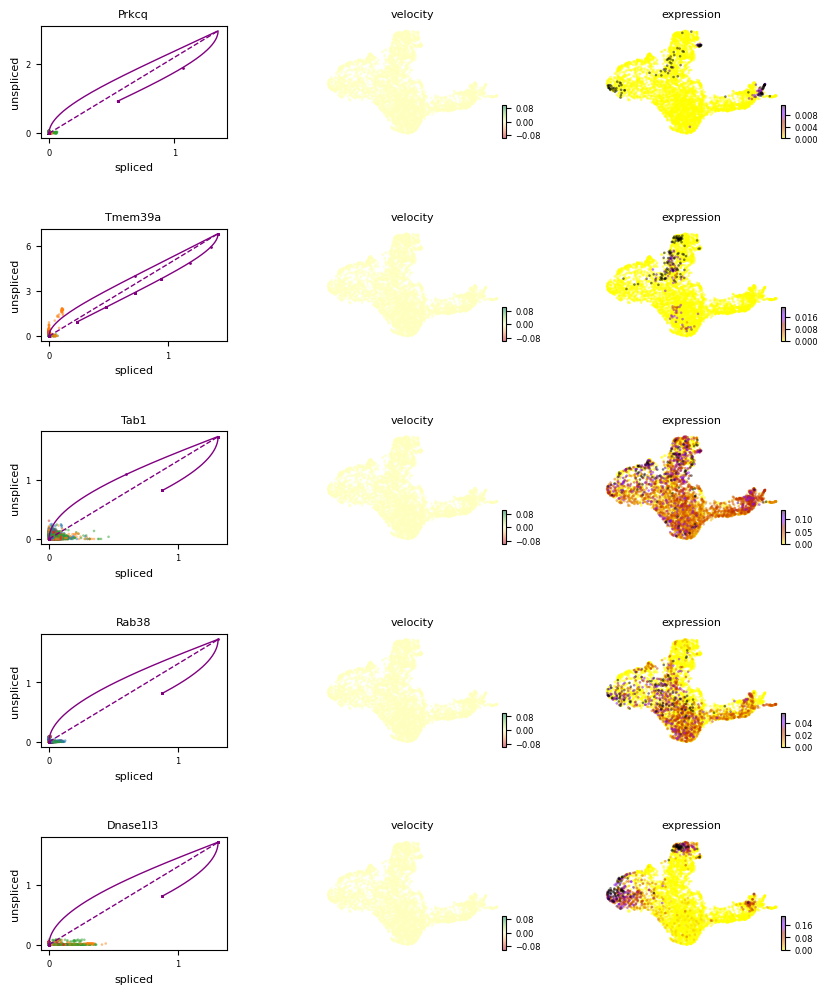

In [32]:
scv.pl.velocity(adata, top_genes[0:5], ncols=1, color='Cells')

In [33]:
scv.tl.score_genes_cell_cycle(adata)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


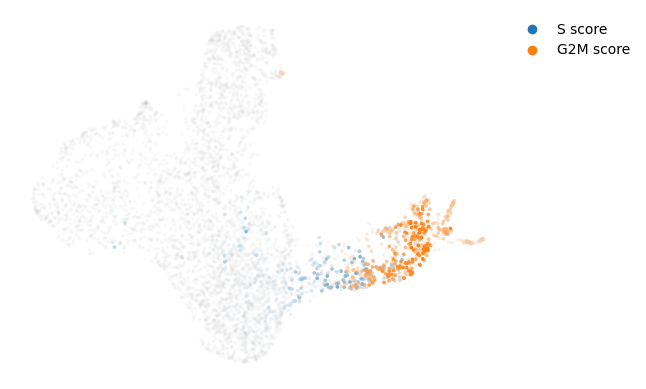

In [34]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

In [34]:
from velodyn.velocity_divergence import compute_div, plot_div

D = compute_div(
    adata=adata,
    use_rep='umap',
    n_grid_points=100,
)
print(D.shape) # (30, 30,)

fig, ax = plot_div(D)

ModuleNotFoundError: No module named 'velodyn'

In [ ]:
from velodyn.velocity_dpst import dPseudotime

DPST = dPseudotime(
    adata=adata,
    use_rep='umap',
    pseudotime_var='velocity_pseudotime',
)
change_in_pseudotime = DPST.predict_dpst()